# Data Import

In [257]:
import pandas as pd
import numpy as np
import os
import seaborn as sns #visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Data load

In [258]:
data = pd.read_csv("2018_2022_dc_charging_output_month.csv")
print(f'\nTrain data shape - {data.shape}')
data.head(6)


Train data shape - (10661, 25)


,evse_sequential_id,evse_charge_month,evse_id,evse_mean_sessions,evse_mean_duration,evse_mean_energy_wh,evse_sum_duration,evse_sum_energy_wh,charger_latest_known_status,charger_vendor,...,connector_current_type,charger_first_connection_date,charger_last_connection_date,charger_authentication_modes,location_name,location_latitude,location_longitude,location_postal_code,location_city,location_charge_point_operator_name
0,0,2020-06-01,DE*EDR*E22100054*2,-5.407036,4.474736,-151.531358,-99.995539,43834.091423,in-service,EFACEC,...,AC,2018-02-01T10:40:17Z,2022-05-12T16:35:29Z,"['R', 'DP']",Neustädter Bucht West DC,54.070886,10.755442,23730.0,23730 Sierksdorf,Tank & Rast
1,1,2021-06-01,DE*EDR*E21000151*1,-24.745861,9.463101,10058.820914,-647.649974,-339280.946557,in-service,EFACEC,...,DC,2020-11-12T12:16:34Z,2022-05-12T16:29:59Z,"['NRC', 'NRD', 'R', 'DP']",Raststätte Donautal Ost DC,48.588522,13.366734,94036.0,Passau,Tank & Rast
2,2,2022-01-01,DE*EDR*E21000190*1,-33.141072,-9.071438,3023.612690,-1168.733070,-526112.770456,in-service,EFACEC,...,DC,2020-11-26T13:12:04Z,2022-05-12T16:29:41Z,"['NRC', 'NRD', 'R', 'DP']",Raststätte Tecklenburger Land Ost DC,52.233763,7.882231,49545.0,Tecklenburger Land,Tank & Rast
3,3,2020-12-01,DE*EDR*E02100072*2,-8.562599,-13.558987,-8318.842964,-344.258979,-117630.186306,in-service,EFACEC,...,AC,2018-02-05T08:35:23Z,2022-05-12T16:40:02Z,"['R', 'DP']",Rohnetal Nord DC,51.435207,11.426726,6542.0,06542 Wolferstedt,Tank & Rast
4,4,2021-01-01,DE*UFC*E210015*1,-9.692522,275.692885,-609.369442,15292.486866,-301933.596802,in-service,EFACEC,...,DC,2020-10-29T15:47:25Z,2022-05-12T16:43:48Z,"['NRC', 'NRD', 'R', 'DP']",Raststätte Vierwinden Süd E.ON UFC,51.125661,6.602056,41516.0,Grevenbroich,UFC Germany (DE*UFC)
5,5,2021-10-01,DE*EDR*E02100064*1,19.926676,-0.830118,7712.021325,744.848929,491633.723854,in-service,EFACEC,...,DC,2018-02-01T16:53:41Z,2022-05-11T16:33:30Z,"['R', 'DP']",Plötzetal Ost DC,51.655934,11.822297,6420.0,06420 Könnern,Tank & Rast


In [259]:
data['location_postal_code'].nunique()

133

In [260]:
data.columns

Index(['evse_sequential_id', 'evse_charge_month', 'evse_id',
       'evse_mean_sessions', 'evse_mean_duration', 'evse_mean_energy_wh',
       'evse_sum_duration', 'evse_sum_energy_wh',
       'charger_latest_known_status', 'charger_vendor', 'charger_model',
       'charger_max_power', 'charger_max_current', 'connector_plug_type',
       'connector_plug_power', 'connector_current_type',
       'charger_first_connection_date', 'charger_last_connection_date',
       'charger_authentication_modes', 'location_name', 'location_latitude',
       'location_longitude', 'location_postal_code', 'location_city',
       'location_charge_point_operator_name'],
      dtype='object')

# External Data load

In [261]:
os.getcwd()

'/Users/freda/Downloads/Python_eon'

In [262]:
# # Changing the Directory
# os.chdir("C://Users//hp/Desktop")

# Data with nearest neighbour distance

In [263]:
ext_data=pd.read_csv('Data with nearest neighbour distance.csv',encoding='latin-1')
ext_data

,ï»¿evse_sequential_id,evse_charge_month,evse_id,evse_mean_sessions,evse_mean_duration,evse_mean_energy_wh,evse_sum_duration,evse_sum_energy_wh,location_latitude,location_longitude,location_postal_code,location_city,Unnamed: 12,Pincode,Latitude of nearest fast charger,Longitude of the nearest fast charger,Distance from the nearet fast charger(in Km)
0,1,01.06.21,DE*EDR*E21000151*1,-24.745861,9.463101,10058.820910,-647.649974,-339280.94660,48.588522,13.366734,94036,Passau,NaN,940,48.559526,13.422500,5.218119
1,2,01.01.22,DE*EDR*E21000190*1,-33.141072,-9.071438,3023.612690,-1168.733070,-526112.77050,52.233763,7.882231,49545,Tecklenburger Land,NaN,495,52.555934,7.943005,36.060358
2,4,01.01.21,DE*UFC*E210015*1,-9.692522,275.692885,-609.369442,15292.486870,-301933.59680,51.125661,6.602056,41516,Grevenbroich,NaN,415,51.061111,6.820522,16.860894
3,5,01.10.21,DE*EDR*E02100064*1,19.926676,-0.830118,7712.021325,744.848929,491633.72390,51.655934,11.822297,6420,06420 KÃÂ¶nnern,NaN,642,49.906861,8.648861,295.932538
4,6,01.02.21,DE*EDR*E11000315*2,-1.895516,-11.499462,5291.557103,-101.181860,-33254.21005,51.927961,8.529158,33659,Bielefeld,NaN,336,52.028614,8.556061,11.342771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,11653,01.12.21,DE*UFC*E110115*1,-8.055549,-0.498572,23000.465520,-269.254618,-95626.86155,49.839264,12.172418,92670,Windischeschenbach,NaN,926,49.663440,12.149010,19.622932
5804,11654,01.05.21,DE*EDR*E21000146*1,6.770576,18.106216,10561.735340,560.725128,392498.77610,52.913791,8.425558,27801,DÃÂ¶tlingen,NaN,278,53.055794,8.501283,16.583826
5805,11655,01.06.21,DE*EDR*E21000183*1,-7.113971,-13.562812,3354.947517,-386.959373,-46776.48141,51.866448,8.369656,59069,Hamm,NaN,590,51.669590,7.810330,44.277751
5806,11659,01.01.22,DE*EDR*E11000302*2,-15.853025,-24.357842,3775.602690,-878.869210,-239053.70340,51.265533,7.249006,42389,Wuppertal,NaN,423,51.265614,7.245308,0.257449


In [264]:
ext_data.columns

Index(['ï»¿evse_sequential_id', 'evse_charge_month', 'evse_id',
       'evse_mean_sessions', 'evse_mean_duration', 'evse_mean_energy_wh',
       'evse_sum_duration', 'evse_sum_energy_wh', 'location_latitude',
       'location_longitude', 'location_postal_code', 'location_city',
       'Unnamed: 12', 'Pincode', 'Latitude of nearest fast charger',
       'Longitude of the nearest fast charger',
       'Distance from the nearet fast charger(in Km)'],
      dtype='object')

In [265]:
#Drop repeated columns
ext_data= ext_data.drop(columns=['evse_charge_month', 'evse_id',
       'evse_mean_sessions', 'evse_mean_duration', 'evse_mean_energy_wh',
       'evse_sum_duration', 'evse_sum_energy_wh', 'location_latitude',
       'location_longitude', 'location_postal_code', 'location_city'])

In [266]:
ext_data.head()

,ï»¿evse_sequential_id,Unnamed: 12,Pincode,Latitude of nearest fast charger,Longitude of the nearest fast charger,Distance from the nearet fast charger(in Km)
0,1,NaN,940,48.559526,13.422500,5.218119
1,2,NaN,495,52.555934,7.943005,36.060358
2,4,NaN,415,51.061111,6.820522,16.860894
3,5,NaN,642,49.906861,8.648861,295.932538
4,6,NaN,336,52.028614,8.556061,11.342771


# Data merge

In [267]:
# rename label
ext_data=ext_data.rename(columns={"ï»¿evse_sequential_id":"evse_sequential_id"})

In [268]:
Data=pd.merge(data,ext_data,on=['evse_sequential_id'] )

In [269]:
Data

,evse_sequential_id,evse_charge_month,evse_id,evse_mean_sessions,evse_mean_duration,evse_mean_energy_wh,evse_sum_duration,evse_sum_energy_wh,charger_latest_known_status,charger_vendor,...,location_latitude,location_longitude,location_postal_code,location_city,location_charge_point_operator_name,Unnamed: 12,Pincode,Latitude of nearest fast charger,Longitude of the nearest fast charger,Distance from the nearet fast charger(in Km)
0,1,2021-06-01,DE*EDR*E21000151*1,-24.745861,9.463101,10058.820914,-647.649974,-339280.946557,in-service,EFACEC,...,48.588522,13.366734,94036.0,Passau,Tank & Rast,NaN,940,48.559526,13.422500,5.218119
1,2,2022-01-01,DE*EDR*E21000190*1,-33.141072,-9.071438,3023.612690,-1168.733070,-526112.770456,in-service,EFACEC,...,52.233763,7.882231,49545.0,Tecklenburger Land,Tank & Rast,NaN,495,52.555934,7.943005,36.060358
2,4,2021-01-01,DE*UFC*E210015*1,-9.692522,275.692885,-609.369442,15292.486866,-301933.596802,in-service,EFACEC,...,51.125661,6.602056,41516.0,Grevenbroich,UFC Germany (DE*UFC),NaN,415,51.061111,6.820522,16.860894
3,5,2021-10-01,DE*EDR*E02100064*1,19.926676,-0.830118,7712.021325,744.848929,491633.723854,in-service,EFACEC,...,51.655934,11.822297,6420.0,06420 Könnern,Tank & Rast,NaN,642,49.906861,8.648861,295.932538
4,6,2021-02-01,DE*EDR*E11000315*2,-1.895516,-11.499462,5291.557103,-101.181860,-33254.210046,in-service,ABB,...,51.927961,8.529158,33659.0,Bielefeld,Tank & Rast,NaN,336,52.028614,8.556061,11.342771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,11653,2021-12-01,DE*UFC*E110115*1,-8.055549,-0.498572,23000.465517,-269.254618,-95626.861545,in-service,ABB,...,49.839264,12.172418,92670.0,Windischeschenbach,UFC Germany (DE*UFC),NaN,926,49.663440,12.149010,19.622932
5804,11654,2021-05-01,DE*EDR*E21000146*1,6.770576,18.106216,10561.735342,560.725128,392498.776092,in-service,EFACEC,...,52.913791,8.425558,27801.0,Dötlingen,Tank & Rast,NaN,278,53.055794,8.501283,16.583826
5805,11655,2021-06-01,DE*EDR*E21000183*1,-7.113971,-13.562812,3354.947517,-386.959373,-46776.481408,in-service,EFACEC,...,51.866448,8.369656,59069.0,Hamm,Tank & Rast,NaN,590,51.669590,7.810330,44.277751
5806,11659,2022-01-01,DE*EDR*E11000302*2,-15.853025,-24.357842,3775.602690,-878.869210,-239053.703395,in-service,ABB,...,51.265533,7.249006,42389.0,Wuppertal,Tank & Rast,NaN,423,51.265614,7.245308,0.257449


# Data explore

In [270]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 0 to 5807
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   evse_sequential_id                            5808 non-null   int64  
 1   evse_charge_month                             5808 non-null   object 
 2   evse_id                                       5808 non-null   object 
 3   evse_mean_sessions                            5808 non-null   float64
 4   evse_mean_duration                            5808 non-null   float64
 5   evse_mean_energy_wh                           5808 non-null   float64
 6   evse_sum_duration                             5808 non-null   float64
 7   evse_sum_energy_wh                            5808 non-null   float64
 8   charger_latest_known_status                   5808 non-null   object 
 9   charger_vendor                                5808 non-null   o

In [271]:
Data.describe()

,evse_sequential_id,evse_mean_sessions,evse_mean_duration,evse_mean_energy_wh,evse_sum_duration,evse_sum_energy_wh,charger_max_power,charger_max_current,location_latitude,location_longitude,location_postal_code,Unnamed: 12,Pincode,Latitude of nearest fast charger,Longitude of the nearest fast charger,Distance from the nearet fast charger(in Km)
count,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5.808000e+03,5808.000000,5808.000000,5808.000000,5808.000000,5776.000000,0.0,5808.000000,5808.000000,5808.000000,5808.000000
mean,5803.280992,4.017608,-0.711840,2743.069526,124.089930,9.679036e+04,94.075069,136.849690,51.190189,10.058404,46941.229398,NaN,535.436811,51.049652,9.702387,60.121301
std,3347.002512,40.130417,124.418803,6132.702923,1588.349350,1.009310e+06,78.016558,113.085111,1.702735,2.046249,30270.527197,NaN,266.783554,1.721786,1.968918,112.564930
min,1.000000,-103.681183,-115.439142,-31813.709817,-3023.524574,-3.057941e+06,0.000000,0.000000,47.827878,6.199559,1723.000000,NaN,140.000000,47.765786,6.173320,0.025957
25%,2929.750000,-18.249370,-9.398560,-42.676772,-599.095626,-3.506198e+05,50.000000,73.000000,50.094653,8.352361,21109.000000,NaN,262.000000,49.812055,8.217435,5.660916
50%,5785.500000,-3.253144,-3.355129,3369.466990,-137.423267,-4.472287e+04,50.000000,73.000000,51.125661,9.966352,45131.000000,NaN,522.000000,50.884242,9.610320,11.850477
75%,8665.250000,20.592296,2.814356,6262.799061,543.038540,4.188363e+05,150.000000,218.000000,52.232453,11.759489,67105.000000,NaN,791.000000,52.430611,11.051600,31.835619
max,11661.000000,332.124388,8620.795813,66774.326409,42299.952769,7.392779e+06,350.000000,508.000000,54.803453,14.330231,99331.000000,NaN,993.000000,54.320170,14.004432,464.546758


In [272]:
Data.rename(columns={'Latitude of nearest fast charger':'Latitude_nearest_charger',
                   'Longitude of the nearest fast charger':'Longitude_nearest_charger',                                      
                   'Distance from the nearet fast charger(in Km)':'Distance_nearest_charger'
                   },inplace=True)

# Correlation

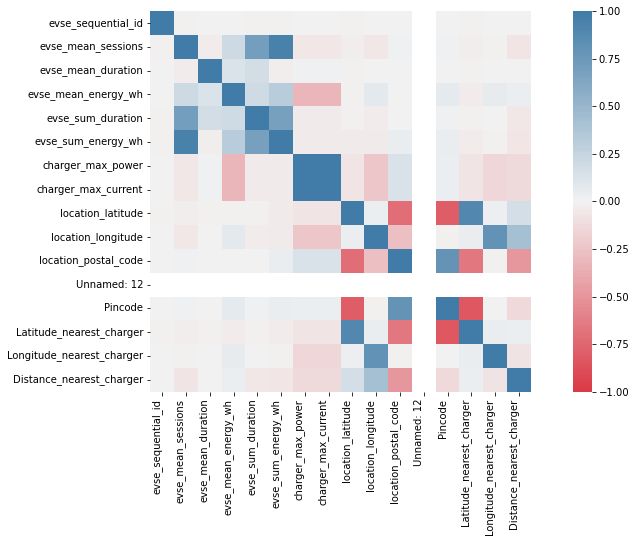

In [273]:
# Correlation - Pre variable selection
corr = Data.corr()
plt.figure(figsize=(15,7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [274]:
Data.corr()

,evse_sequential_id,evse_mean_sessions,evse_mean_duration,evse_mean_energy_wh,evse_sum_duration,evse_sum_energy_wh,charger_max_power,charger_max_current,location_latitude,location_longitude,location_postal_code,Unnamed: 12,Pincode,Latitude_nearest_charger,Longitude_nearest_charger,Distance_nearest_charger
evse_sequential_id,1.000000,-0.019882,0.004561,0.001357,-0.018100,-0.015237,0.004572,0.004571,-0.009746,-0.003139,0.006985,NaN,0.003435,-0.012037,-0.002285,-0.005759
evse_mean_sessions,-0.019882,1.000000,-0.031372,0.197854,0.697952,0.949141,-0.058535,-0.058294,-0.030015,-0.054112,0.022299,NaN,0.019002,-0.025818,-0.022292,-0.071361
evse_mean_duration,0.004561,-0.031372,1.000000,0.129354,0.173553,-0.024213,0.017193,0.017216,-0.008486,-0.002111,0.003013,NaN,0.003563,-0.010824,0.000326,0.000214
evse_mean_energy_wh,0.001357,0.197854,0.129354,1.000000,0.194818,0.313438,-0.324986,-0.324735,-0.016191,0.077871,0.001343,NaN,0.066280,-0.033635,0.052318,0.031453
evse_sum_duration,-0.018100,0.697952,0.173553,0.194818,1.000000,0.686945,-0.041956,-0.041759,-0.016130,-0.032149,0.006764,NaN,0.010168,-0.016649,-0.007587,-0.049286
evse_sum_energy_wh,-0.015237,0.949141,-0.024213,0.313438,0.686945,1.000000,-0.040157,-0.039871,-0.043510,-0.045181,0.044442,NaN,0.040717,-0.038616,-0.018211,-0.063109
charger_max_power,0.004572,-0.058535,0.017193,-0.324986,-0.041956,-0.040157,1.000000,0.999999,-0.075701,-0.238660,0.135246,NaN,0.034852,-0.074561,-0.143792,-0.129583
charger_max_current,0.004571,-0.058294,0.017216,-0.324735,-0.041759,-0.039871,0.999999,1.000000,-0.075753,-0.238697,0.135202,NaN,0.034871,-0.074629,-0.143897,-0.129468
location_latitude,-0.009746,-0.030015,-0.008486,-0.016191,-0.016130,-0.043510,-0.075701,-0.075753,1.000000,0.036806,-0.713530,NaN,-0.801862,0.893738,0.029286,0.163782
location_longitude,-0.003139,-0.054112,-0.002111,0.077871,-0.032149,-0.045181,-0.238660,-0.238697,0.036806,1.000000,-0.260078,NaN,-0.014459,0.045503,0.801428,0.426731


# Drop Nan

In [275]:
Data=Data[Data.columns[Data.columns.isin([
    'evse_mean_sessions',
    'evse_mean_duration',
    'evse_mean_energy_wh',
    'evse_sum_duration',
    'evse_sum_energy_wh',
    'location_latitude',
    'location_longitude',
    'location_postal_code',
    'location_city',
    'Pincode',
    'Latitude_nearest_charger',
    'Longitude_nearest_charger',
    'Distance_nearest_charger'])]]
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 0 to 5807
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   evse_mean_sessions         5808 non-null   float64
 1   evse_mean_duration         5808 non-null   float64
 2   evse_mean_energy_wh        5808 non-null   float64
 3   evse_sum_duration          5808 non-null   float64
 4   evse_sum_energy_wh         5808 non-null   float64
 5   location_latitude          5808 non-null   float64
 6   location_longitude         5808 non-null   float64
 7   location_postal_code       5776 non-null   float64
 8   location_city              5808 non-null   object 
 9   Pincode                    5808 non-null   int64  
 10  Latitude_nearest_charger   5808 non-null   float64
 11  Longitude_nearest_charger  5808 non-null   float64
 12  Distance_nearest_charger   5808 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage

In [276]:
Data = Data.dropna()
print(Data.shape)

(5776, 13)


In [277]:
#Duplicated Rows
print("\nNumber of duplicated rows in data=",Data.duplicated().sum())


Number of duplicated rows in data= 0


<function matplotlib.pyplot.show(close=None, block=None)>

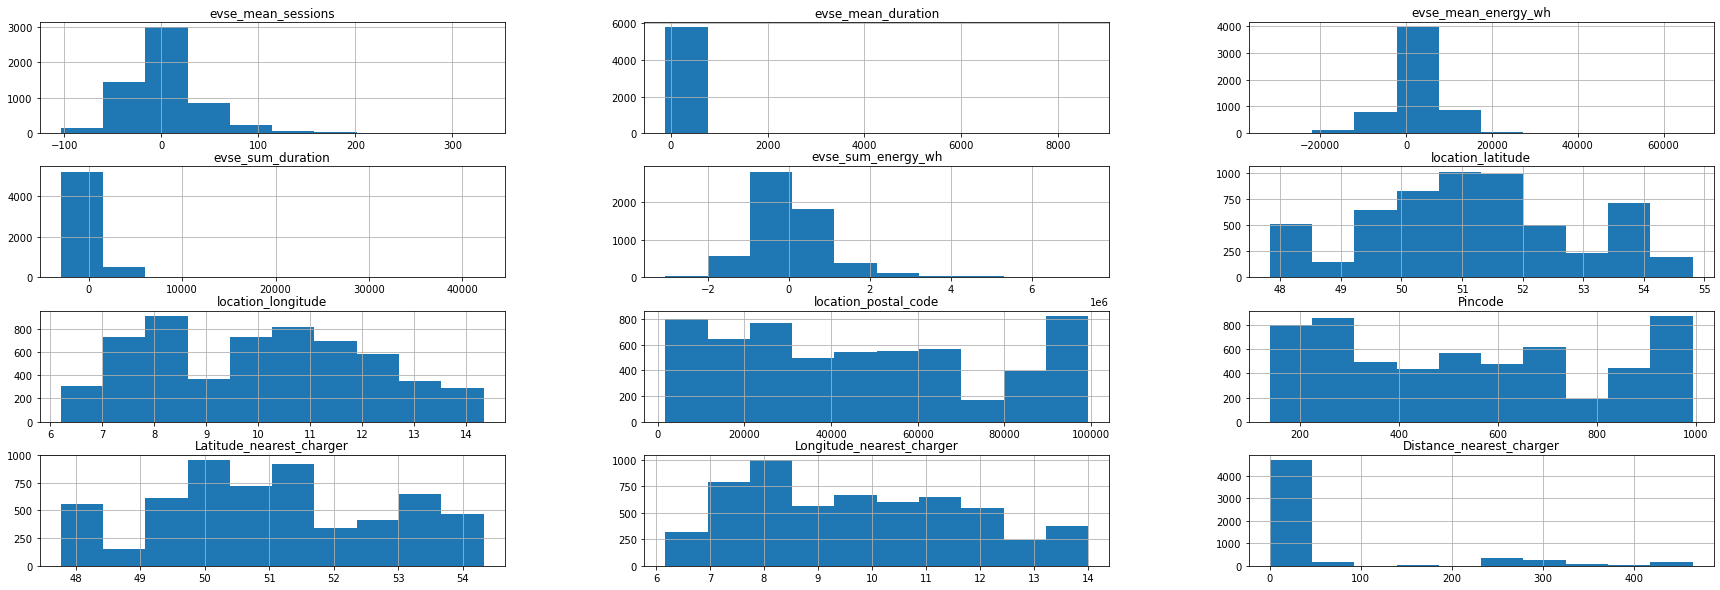

In [278]:
Data.hist(figsize=(30,10))
plt.show

In [279]:
outliers = ((Data["evse_mean_duration"]>200)|(Data["evse_sum_duration"]>6000))
print("There are {} outliers".format(Data[outliers]["Pincode"].count()))
len(Data)

There are 40 outliers


5776

In [280]:
Data = Data[~outliers]
len(Data)

5736

<function matplotlib.pyplot.show(close=None, block=None)>

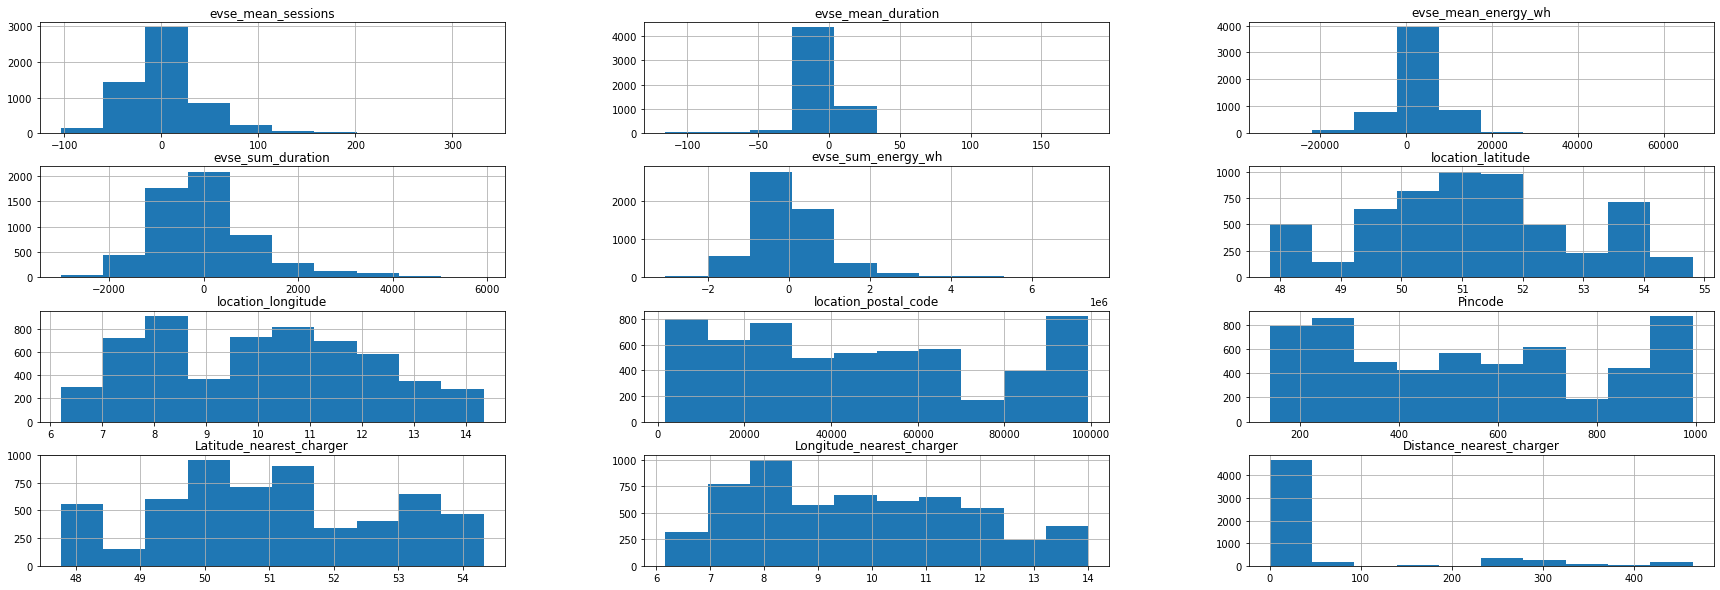

In [281]:
Data.hist(figsize=(30,10))
plt.show

# Y1

In [314]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X=np.concatenate([
    Data.location_latitude.values.astype('float64').reshape(-1,1),
    Data.location_longitude.values.astype('float64').reshape(-1,1),
    Data.location_postal_code.values.astype('float64').reshape(-1,1),
    Data.Pincode.values.astype('float64').reshape(-1,1),
    Data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
X=preprocessing.MinMaxScaler((-1,1)).fit_transform(X)
Y1=Data.evse_sum_energy_wh.values
Y1=preprocessing.MinMaxScaler((-1,1)).fit_transform(Y1.reshape(-1,1)).flatten()
#X_train,X_test,y1_train,y1_test=train_test_split(X, Y1, test_size=0.20,random_state=470)

In [315]:
X

array([[-0.78191217,  0.76299696,  0.89150479, ..., -0.75779864,
         0.85137947, -0.97764508],
       [ 0.26323206, -0.58609276, -0.0201213 , ...,  0.46166237,
        -0.54803731, -0.84485344],
       [ 0.09755999,  0.38309306, -0.90375789, ..., -0.34667384,
        -0.36776769,  0.27402941],
       ...,
       [ 0.15791745, -0.46619492,  0.17502664, ...,  0.19120397,
        -0.58192144, -0.80947336],
       [-0.01437373, -0.74185479, -0.16674863, ...,  0.06793504,
        -0.7262233 , -0.99900331],
       [-0.34412575, -0.65591872,  0.11810507, ..., -0.15158825,
        -0.62611031, -0.79353897]])

In [316]:
Y1

array([-0.47971815, -0.51547298, -0.32070237, ..., -0.42374029,
       -0.46053723, -0.29084252])

In [317]:
X_train,X_test,y1_train,y1_test=train_test_split(X, Y1, test_size=0.20,random_state=470)

# Models

In [327]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [328]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [330]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y1_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y1_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.12102907727485135
MSE: 0.0363526478213622
RMSE: 0.19066370347122233
R2 Score: 0.00718352450387072
------------------------------


In [331]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=250, learning_rate=0.01,max_depth=5)
gb.fit(X_train, y1_train)
predictions = gb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y1_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "GBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.1066606531099752
MSE: 0.030191572007194613
RMSE: 0.17375722145336756
R2 Score: 0.17544685445839014
------------------------------


In [332]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100,n_jobs=-10)
random_forest.fit(X_train, y1_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y1_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.10340688464326474
MSE: 0.03030677665009944
RMSE: 0.17408841618585494
R2 Score: 0.17230053433085468
------------------------------


In [333]:
#MLP
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200),# 200.200 #100,100
                     alpha=0.,
                     #validation_fraction=0.,
                     learning_rate_init=0.0001,
                     n_iter_no_change=500,
                     max_iter=1000,
                     verbose=True,
                   #activation='tahn',
                  ).fit(X_train, y1_train)
predictions = mlp.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y1_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "MLPRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

Iteration 1, loss = 0.02527367
Iteration 2, loss = 0.01863050
Iteration 3, loss = 0.01790161
Iteration 4, loss = 0.01771560
Iteration 5, loss = 0.01763976
Iteration 6, loss = 0.01757081
Iteration 7, loss = 0.01751299
Iteration 8, loss = 0.01744992
Iteration 9, loss = 0.01741827
Iteration 10, loss = 0.01737319
Iteration 11, loss = 0.01735135
Iteration 12, loss = 0.01726839
Iteration 13, loss = 0.01724670
Iteration 14, loss = 0.01721760
Iteration 15, loss = 0.01722906
Iteration 16, loss = 0.01722221
Iteration 17, loss = 0.01717794
Iteration 18, loss = 0.01713379
Iteration 19, loss = 0.01711431
Iteration 20, loss = 0.01707485
Iteration 21, loss = 0.01704742
Iteration 22, loss = 0.01702487
Iteration 23, loss = 0.01702054
Iteration 24, loss = 0.01704047
Iteration 25, loss = 0.01699354
Iteration 26, loss = 0.01704336
Iteration 27, loss = 0.01696621
Iteration 28, loss = 0.01691390
Iteration 29, loss = 0.01694538
Iteration 30, loss = 0.01691742
Iteration 31, loss = 0.01688247
Iteration 32, los

# Model Comparison

In [334]:
models.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
2,RandomForestRegressor,0.103407,0.030307,0.174088,0.172301
1,GBRegressor,0.106661,0.030192,0.173757,0.175447
3,MLPRegressor,0.108584,0.03142,0.177257,0.141892
0,LinearRegression,0.121029,0.036353,0.190664,0.007184


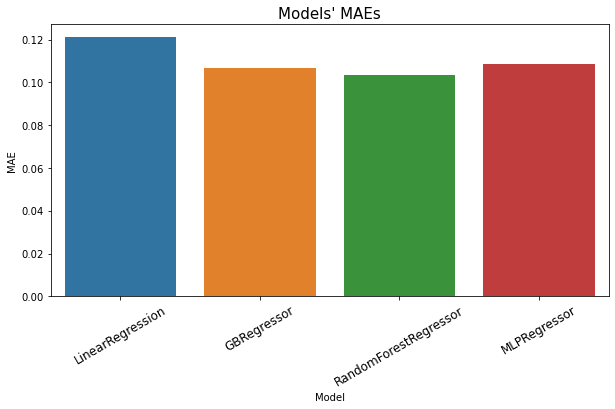

In [335]:
plt.figure(figsize=(10,5))
sns.barplot(x=models["Model"], y=models["MAE"])
plt.title("Models' MAEs", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# Gas Stations Data

In [112]:
ext_data=pd.read_csv('Gas Station GPS cordinates & distance from nearest fast charger.csv',encoding='latin-1')

In [113]:
#rename
ext_data.rename(columns={
    'ï»¿Gas_Stations_Address':'Gas_Stations_Address',
    'Pincode':'location_postal_code', 
    'Pincode( frst 3 characters)':'Pincode',                                 
    'Distance with the nearest fast EV charger':'Distance_nearest_charger',
    'Latitude':'location_latitude','Longitude':'location_longitude',
    'Latitiude of the nearest Fast Charger':'Latitude_nearest_charger',
    'Longitude of the nearest fast charger':'Longitude_nearest_charger'},inplace=True)
print(ext_data.dtypes)
print(ext_data.shape)

Gas_Stations_Address          object
location_latitude            float64
location_longitude           float64
location_postal_code           int64
Pincode                        int64
Latitude_nearest_charger     float64
Longitude_nearest_charger    float64
Distance_nearest_charger     float64
dtype: object
(1256, 8)


In [114]:
ext_data=ext_data.dropna()
print(ext_data.shape)

(1244, 8)


In [115]:
#Duplicated Rows
print(ext_data.duplicated().sum())

18


In [116]:
ext_data.drop_duplicates(inplace = True)
print(ext_data.shape)

(1226, 8)


In [117]:
ext_data.location_latitude.value_counts()

48.747446    4
51.859557    4
48.902348    3
50.945910    3
50.837119    3
            ..
48.801164    1
49.349776    1
49.322948    1
48.691003    1
52.883269    1
Name: location_latitude, Length: 1122, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

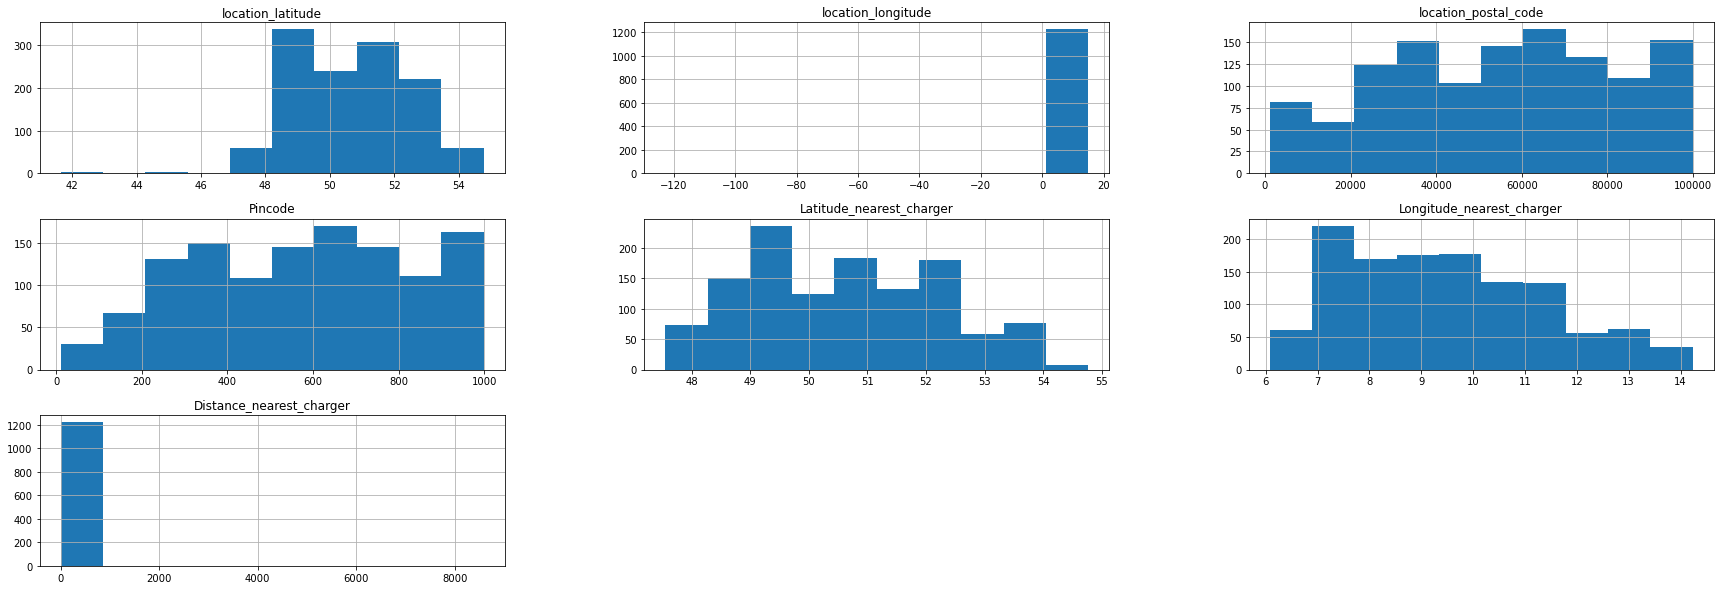

In [118]:
ext_data.hist(figsize=(30,10))
plt.show

In [119]:
outliers = ((ext_data["location_latitude"]<4)|(ext_data["location_longitude"]<4)|(ext_data["Distance_nearest_charger"]>2000))
print("There are {} outliers".format(ext_data[outliers]["Gas_Stations_Address"].count()))
len(ext_data)

There are 4 outliers


1226

In [120]:
ext_data = ext_data[~outliers]
len(ext_data)

1222

<function matplotlib.pyplot.show(close=None, block=None)>

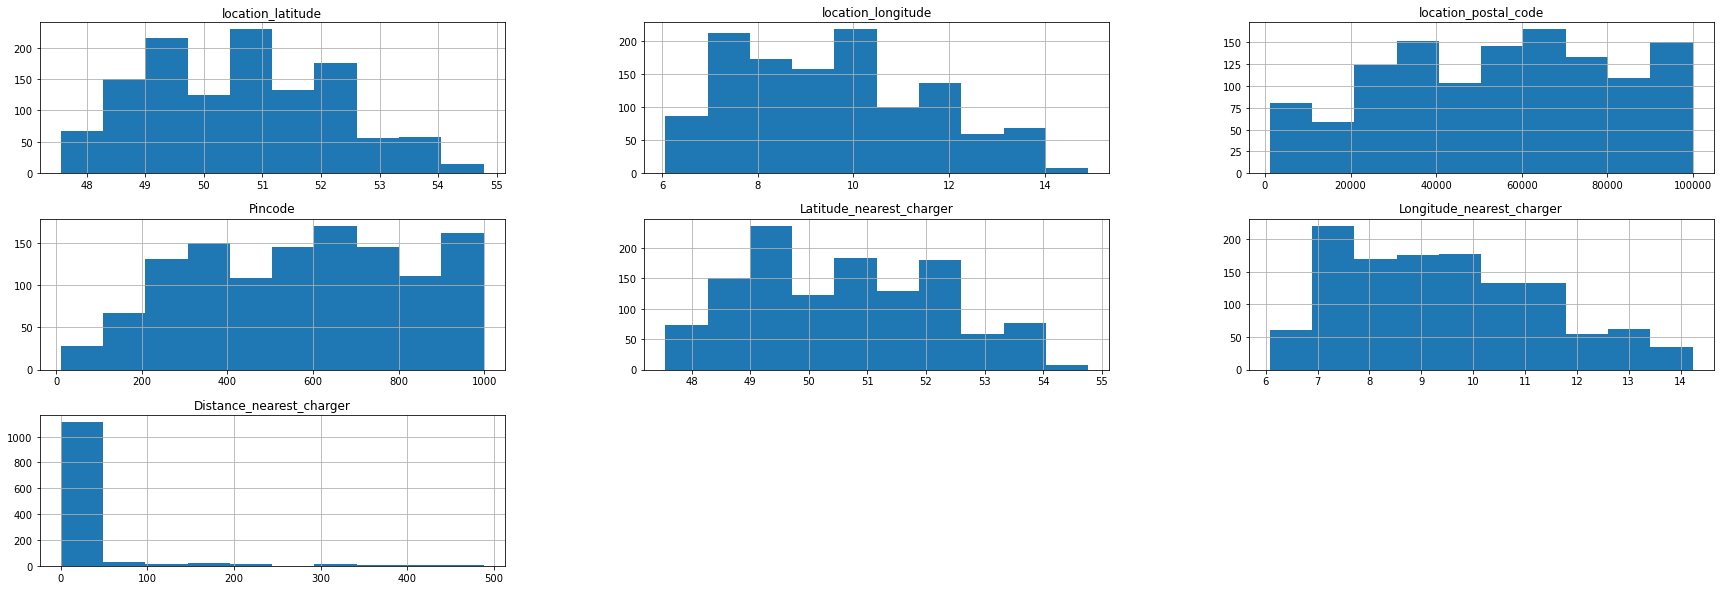

In [121]:
ext_data.hist(figsize=(30,10))
plt.show

# Saving predictions

In [123]:
#Saving Predictions
Xp=np.concatenate([
    ext_data.location_latitude .values.astype('float64').reshape(-1,1),
    ext_data.location_longitude.values.astype('float64').reshape(-1,1),
    ext_data.location_postal_code.values.astype('float64').reshape(-1,1),
    ext_data.Pincode.values.astype('float64').reshape(-1,1),
    ext_data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
Xp=preprocessing.MinMaxScaler((-1,1)).fit_transform(Xp)
yp=preprocessing.MinMaxScaler((-1,1)).fit_transform(random_forest.predict(Xp).reshape(-1,1)).flatten()
ext_data['evse_sum_energy_wh']=yp

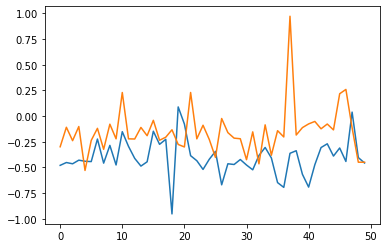

In [124]:
plt.plot(y1_test[:50])
plt.plot(yp[:50])

# Priority wise Sorting

In [125]:
# Priority wise Sorting
ext_data.sort_values(by="evse_sum_energy_wh",ascending=False)

,Gas_Stations_Address,location_latitude,location_longitude,location_postal_code,Pincode,Latitude_nearest_charger,Longitude_nearest_charger,Distance_nearest_charger,evse_sum_energy_wh
58,Roxeler StraâÃ¼e 556 Â¬â 48161 MâÂºnster,51.952998,7.534574,48161,481,51.964164,7.631980,6.788931,1.000000
38,HarkortstraâÃ¼e 4 Â¬â 48163 MâÂºnster,51.924183,7.561678,48163,481,51.964164,7.631980,6.556259,0.972343
55,WiedaustraâÃ¼e 101 Â¬â 48163 MâÂºnster,51.893987,7.583704,48163,481,51.964164,7.631980,8.476395,0.799697
125,Altenberger StraâÃ¼e 34 Â¬â 48161 MâÂºnster,51.999816,7.558589,48161,481,51.964164,7.631980,6.401503,0.769513
875,Bocholter StraâÃ¼e 6 Â¬â 46419 Isselburg,51.817768,6.467664,46419,464,51.834455,6.701539,16.179591,0.651702
...,...,...,...,...,...,...,...,...,...
369,A9 Osterfeld Ost Â¬â 06721 Osterfeld,51.105456,11.958265,6721,672,49.537156,8.180606,319.846370,-0.777832
350,Hallesche StraâÃ¼e 41/Schwa Â¬â 06686 Lâ...,51.184260,12.011886,6686,668,49.412200,7.548900,373.158462,-0.808005
76,GewerbestraâÃ¼e 1 Â¬â 21279 Hollenstedt,53.361197,9.706298,21279,212,53.410257,9.989662,19.568252,-0.821416
71,Longericher StraâÃ¼e 543 Â¬â 50739 Kââln,50.981524,6.921098,50739,507,50.963081,6.955304,3.153070,-0.833158


In [126]:
# Choosing top 1000 locations
with pd.ExcelWriter('output.xlsx') as writer:  
    ext_data.sort_values(by="evse_sum_energy_wh",ascending=False).to_excel(writer, sheet_name='Sheet_name_1')
    

# Y2

In [464]:
X=np.concatenate([
    Data.location_latitude.values.astype('float64').reshape(-1,1),
    Data.location_longitude.values.astype('float64').reshape(-1,1),
    Data.location_postal_code.values.astype('float64').reshape(-1,1),
    Data.Pincode.values.astype('float64').reshape(-1,1),
    Data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
Y2=Data.evse_sum_duration.values
Y2=preprocessing.MinMaxScaler((-1,1)).fit_transform(Y2.reshape(-1,1)).flatten()
X_train,X_test,y2_train,y2_test=X[:1000],X[1000:1200],Y2[:1000],Y2[1000:1200]

In [465]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-6)
M2=rfr.fit(X_train,y2_train) # fit the training data
print(rfr.score(X_test,y2_test)) # perform the model on the test data and return the accuracy score
print(mean_squared_error(rfr.predict(X_test),y2_test))
y2_pred_test=rfr.predict(X_test)

-0.38715216877879755
0.005820518661202946


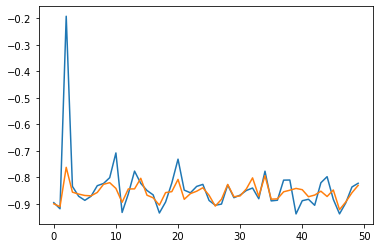

In [466]:
plt.plot(y2_train[:50])
plt.plot(rfr.predict(X_train)[:50])

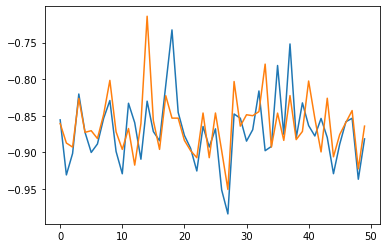

In [467]:
plt.plot(y2_test[:50])
plt.plot(rfr.predict(X_test)[:50])

In [468]:
#Saving Predictions
X=np.concatenate([
    ext_data.location_latitude .values.astype('float64').reshape(-1,1),
    ext_data.location_longitude.values.astype('float64').reshape(-1,1),
    ext_data.location_postal_code.values.astype('float64').reshape(-1,1),
    ext_data.Pincode.values.astype('float64').reshape(-1,1),
    ext_data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
ext_data['evse_sum_duration']=rfr.predict(X)

# Y3

In [469]:
X=np.concatenate([
    Data.location_latitude.values.astype('float64').reshape(-1,1),
    Data.location_longitude.values.astype('float64').reshape(-1,1),
    Data.location_postal_code.values.astype('float64').reshape(-1,1),
    Data.Pincode.values.astype('float64').reshape(-1,1),
    Data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
Y3=Data.evse_mean_sessions.values
Y3=preprocessing.MinMaxScaler((-1,1)).fit_transform(Y3.reshape(-1,1)).flatten()
X_train,X_test,y3_train,y3_test=X[:1000],X[1000:1200],Y3[:1000],Y3[1000:1200]

In [470]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-6)
M3=rfr.fit(X_train,y3_train) # fit the training data
print(rfr.score(X_test,y3_test)) # perform the model on the test data and return the accuracy score
print(mean_squared_error(rfr.predict(X_test),y3_test))
y3_pred_test=rfr.predict(X_test)

0.12963945104772523
0.026471784270298948


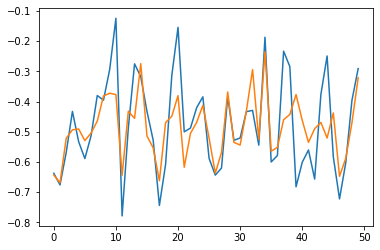

In [471]:
plt.plot(y3_train[:50])
plt.plot(rfr.predict(X_train)[:50])

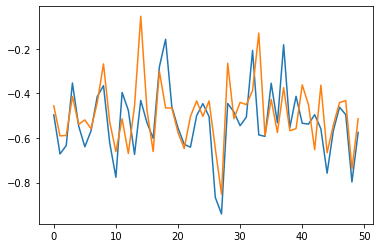

In [428]:
plt.plot(y3_test[:50])
plt.plot(rfr.predict(X_test)[:50])

In [472]:
#Saving Predictions
X=np.concatenate([
    ext_data.location_latitude .values.astype('float64').reshape(-1,1),
    ext_data.location_longitude.values.astype('float64').reshape(-1,1),
    ext_data.location_postal_code.values.astype('float64').reshape(-1,1),
    ext_data.Pincode.values.astype('float64').reshape(-1,1),
    ext_data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
ext_data['evse_mean_sessions']=rfr.predict(X)

# Y4 

In [475]:
X=np.concatenate([
    Data.location_latitude.values.astype('float64').reshape(-1,1),
    Data.location_longitude.values.astype('float64').reshape(-1,1),
    Data.location_postal_code.values.astype('float64').reshape(-1,1),
    Data.Pincode.values.astype('float64').reshape(-1,1),
    Data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
Y4=Data.evse_mean_duration.values
Y4=preprocessing.MinMaxScaler((-1,1)).fit_transform(Y4.reshape(-1,1)).flatten()
X_train,X_test,y4_train,y4_test=X[:1000],X[1000:1200],Y4[:1000],Y4[1000:1200]

In [476]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-6)
M4=rfr.fit(X_train,y4_train) # fit the training data
print(rfr.score(X_test,y4_test)) # perform the model on the test data and return the accuracy score
print(mean_squared_error(rfr.predict(X_test),y4_test))
y4_pred_test=rfr.predict(X_test)

-0.8821477034996592
2.1605309286097368e-05


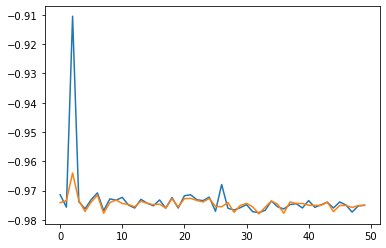

In [477]:
plt.plot(y4_train[:50])
plt.plot(rfr.predict(X_train)[:50])

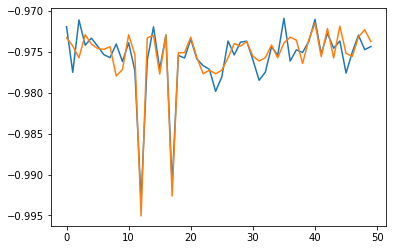

In [478]:
plt.plot(y4_test[:50])
plt.plot(rfr.predict(X_test)[:50])

In [479]:
#Saving Predictions
X=np.concatenate([
    ext_data.location_latitude .values.astype('float64').reshape(-1,1),
    ext_data.location_longitude.values.astype('float64').reshape(-1,1),
    ext_data.location_postal_code.values.astype('float64').reshape(-1,1),
    ext_data.Pincode.values.astype('float64').reshape(-1,1),
    ext_data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    ext_data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
ext_data['evse_mean_duration']=rfr.predict(X)

# Y5

In [480]:
X=np.concatenate([
    Data.location_latitude.values.astype('float64').reshape(-1,1),
    Data.location_longitude.values.astype('float64').reshape(-1,1),
    Data.location_postal_code.values.astype('float64').reshape(-1,1),
    Data.Pincode.values.astype('float64').reshape(-1,1),
    Data.Latitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Longitude_nearest_charger.values.astype('float64').reshape(-1,1),
    Data.Distance_nearest_charger.values.astype('float64').reshape(-1,1),
], axis=1)
Y5=Data.evse_mean_energy_wh.values
Y5=preprocessing.MinMaxScaler((-1,1)).fit_transform(Y5.reshape(-1,1)).flatten()
X_train,X_test,y5_train,y5_test=X[:1000],X[1000:1200],Y5[:1000],Y5[1000:1200]

In [481]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-6)
M5=rfr.fit(X_train,y5_train) # fit the training data
print(rfr.score(X_test,y5_test)) # perform the model on the test data and return the accuracy score
print(mean_squared_error(rfr.predict(X_test),y5_test))
y5_pred_test=rfr.predict(X_test)

0.2415842264955026
0.009479230954407412


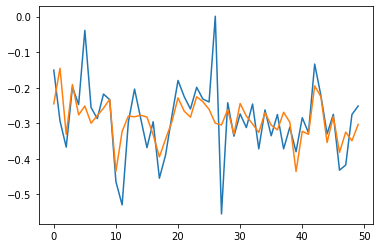

In [482]:
plt.plot(y5_train[:50])
plt.plot(rfr.predict(X_train)[:50])

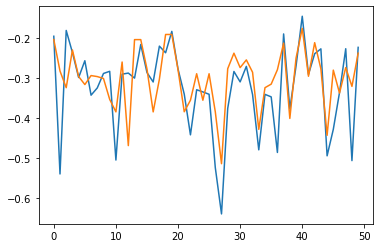

In [483]:
plt.plot(y5_test[:50])
plt.plot(rfr.predict(X_test)[:50])